<a href="https://colab.research.google.com/github/Mostafa-Mokthar/Web-Security-Academy-Series/blob/main/binF3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as  pd
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras import losses,optimizers ,datasets ,layers
from tensorflow.keras.layers import Dense ,Conv2D ,MaxPool2D,Dropout,Flatten
from keras.utils import to_categorical

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_dataset_path = '/content/gdrive/MyDrive/graduation project/new start 2/training'
validation_dataset_path = '/content/gdrive/MyDrive/graduation project/new start 2/validation'

In [ ]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 64

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=40,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary',
                                                   shuffle=True)

Found 240 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='binary',
                                                             shuffle=True)

Found 70 images belonging to 2 classes.


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : abnormal
1 : normal


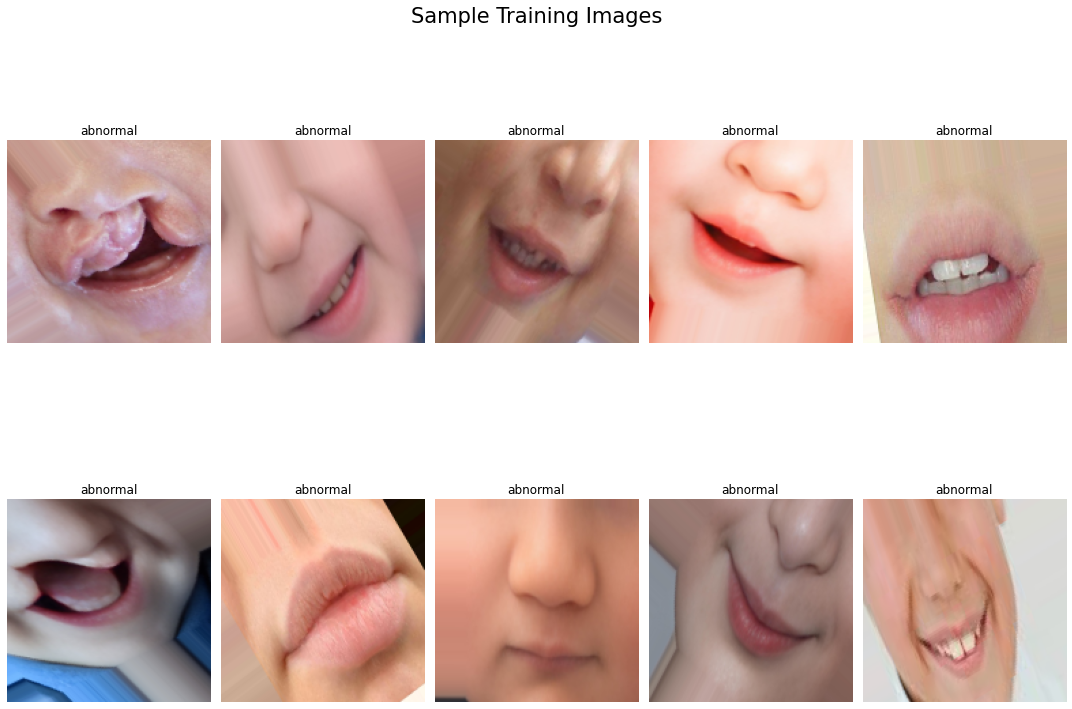

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer= 'adam',
             metrics=['accuracy'])

In [ ]:
result = model.fit(train_generator, epochs=150, validation_data=validation_generator,
                       verbose=2,
                      validation_split=0.1,
                       callbacks=[reduce_lr])

Epoch 1/150
4/4 - 20s - loss: 2.0780 - accuracy: 0.5167 - val_loss: 0.8264 - val_accuracy: 0.5143 - lr: 0.0010 - 20s/epoch - 5s/step
Epoch 2/150
4/4 - 13s - loss: 0.7581 - accuracy: 0.4958 - val_loss: 0.6922 - val_accuracy: 0.5143 - lr: 0.0010 - 13s/epoch - 3s/step
Epoch 3/150
4/4 - 9s - loss: 0.6929 - accuracy: 0.5083 - val_loss: 0.6934 - val_accuracy: 0.4857 - lr: 0.0010 - 9s/epoch - 2s/step
Epoch 4/150
4/4 - 12s - loss: 0.6901 - accuracy: 0.5250 - val_loss: 0.6925 - val_accuracy: 0.5143 - lr: 0.0010 - 12s/epoch - 3s/step
Epoch 5/150
4/4 - 10s - loss: 0.6859 - accuracy: 0.5375 - val_loss: 0.6920 - val_accuracy: 0.4429 - lr: 0.0010 - 10s/epoch - 3s/step
Epoch 6/150
4/4 - 12s - loss: 0.6795 - accuracy: 0.5417 - val_loss: 0.6897 - val_accuracy: 0.5429 - lr: 0.0010 - 12s/epoch - 3s/step
Epoch 7/150
4/4 - 9s - loss: 0.6635 - accuracy: 0.6208 - val_loss: 0.6818 - val_accuracy: 0.6000 - lr: 0.0010 - 9s/epoch - 2s/step
Epoch 8/150
4/4 - 13s - loss: 0.6495 - accuracy: 0.5958 - val_loss: 0.691

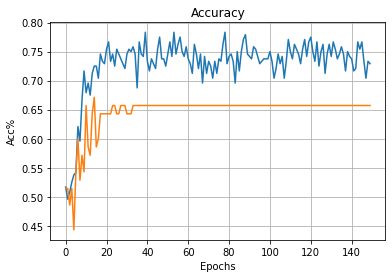

In [ ]:
plt.plot(result.history["accuracy"])
plt.plot(result.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc%")
plt.grid()

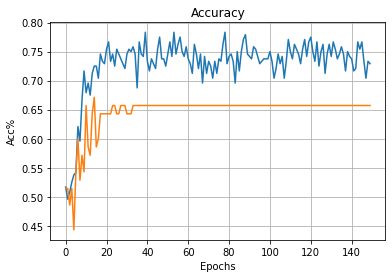

In [ ]:
plt.plot(result.history["accuracy"])
plt.plot(result.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc%")
plt.grid()

In [ ]:
train_accuracy = result.history['accuracy']
val_accuracy = result.history['val_accuracy']

train_loss = result.history['loss']
val_loss = result.history['val_loss']

learning_rate = result.history['lr']

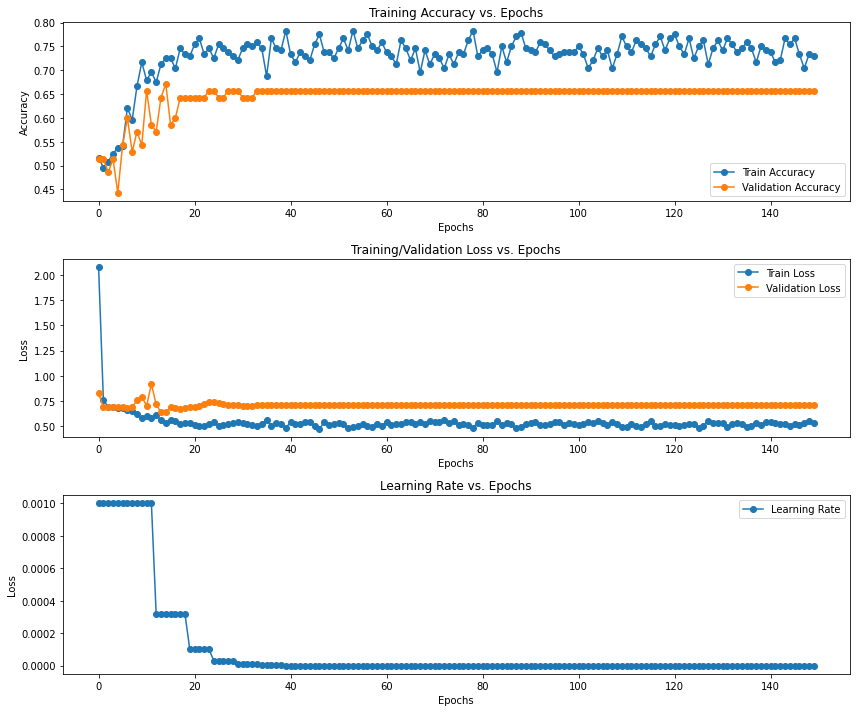

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
# Save the model
model.save('graduation.h5')



### **6. Testing the Model on Test Set**

In [ ]:
test_dataset = '/content/gdrive/MyDrive/graduation project/new start 2/testing'

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='binary')

Found 0 images belonging to 0 classes.


### **7. Model Prediction on the Test Dataset**

In [ ]:
predictions = model.predict(test_generator)

ValueError: ignored

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)

In [ ]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")